In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
file_path = 'variant_summary.clean.PRPH2'
data = pd.read_csv(file_path, delimiter='\t')

data.head()

,gene,var_type,consequence,significance,origin,transcript,aa_ref,pos_aa,aa_alt,id,diseases,key
0,PRPH2,Microsatellite,deletion,Pathogenic/Likely pathogenic,germline,NM_000322.5,Cys,119,del,CV:28201,Retinitis pigmentosa 7|not provided,6;42689715;42689717;na;na
1,PRPH2,single nucleotide variant,missense,Pathogenic,germline;inherited;unknown,NM_000322.5,Pro,216,Leu,CV:28203,Retinitis pigmentosa 7|not provided|PRPH2-rela...,6;42672284;42672284;na;na
2,PRPH2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline,NM_000322.5,Leu,185,Pro,CV:28204,"Retinitis pigmentosa 7, digenic|not provided|L...",6;42689519;42689519;na;na
3,PRPH2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline;unknown,NM_000322.5,Arg,172,Gln,CV:28206,"Choroidal dystrophy, central areolar 2|not pro...",6;42689558;42689558;na;na
4,PRPH2,single nucleotide variant,stop_gain,Pathogenic,germline,NM_000322.5,Tyr,258,Ter,CV:28207,not provided|Vitelliform macular dystrophy 3,6;42672157;42672157;na;na


In [8]:
data.columns

Index(['gene', 'var_type', 'consequence', 'significance', 'origin',
       'transcript', 'aa_ref', 'pos_aa', 'aa_alt', 'id', 'diseases', 'key'],
      dtype='object')

In [9]:
data.shape

(815, 12)

In [32]:
print(data[["consequence"]].value_counts().sort_values())
print(data[[ "var_type"]].value_counts().sort_values())
data[["significance"]].value_counts().sort_values()
data[["origin"]].value_counts().sort_values()



consequence         
copy number               1
genomic                   2
duplication               3
5-UTR                     6
splice-donor/aceptor     10
deletion                 34
intronic                 49
3-UTR                    52
stop_gain                69
synonyomus               89
frameshift              118
missense                382
Name: count, dtype: int64
var_type                 
Inversion                      1
copy number loss               1
Insertion                     10
Indel                         14
Microsatellite                15
Duplication                   42
Deletion                     115
single nucleotide variant    617
Name: count, dtype: int64


origin                                       
de novo;germline                                   1
de novo;germline;unknown                           1
somatic                                            1
paternal                                           1
germline;not applicable                            1
not applicable                                     1
de novo                                            1
biparental;de novo;germline;inherited;unknown      1
germline;inherited;unknown                         3
not provided                                       8
unknown                                            9
germline;inherited                                11
germline;unknown                                  48
germline                                         728
Name: count, dtype: int64

In [33]:
data[(data["consequence"] == "copy number") |
     (data["consequence"] == "genomic") |
     (data["consequence"] == "duplication")]

,gene,var_type,consequence,significance,origin,transcript,aa_ref,pos_aa,aa_alt,id,diseases,key
494,PRPH2,copy number loss,copy number,Pathogenic,germline,GRCh37/hg19 6p21.1(chr6,NaN,42672103-42672349)x1,NaN,CV:1165338,not provided,6;42672103;42672349;na;na
499,PRPH2,single nucleotide variant,genomic,Benign,germline,NC_000006.12,NaN,g.42722950A>C,NaN,CV:1246755,not provided,6;42690688;42690688;na;na
510,PRPH2,single nucleotide variant,genomic,Benign,germline,NC_000006.12,NaN,g.42722776G>A,NaN,CV:1279897,not provided,6;42690514;42690514;na;na
620,PRPH2,Duplication,duplication,Uncertain significance,germline,NC_000006.11,NaN,NaN,NaN,CV:1939204,PRPH2-related disorder,6;41126341;43737486;na;na
621,PRPH2,Duplication,duplication,Likely pathogenic,germline,NC_000006.11,NaN,NaN,NaN,CV:1939205,PRPH2-related disorder,6;42672083;42672369;na;na
746,PRPH2,Duplication,duplication,Uncertain significance,unknown,NC_000006.11,NaN,NaN,NaN,CV:3403790,PRPH2-related disorder,6;42689472;42690072;na;na


In [34]:
data.groupby('consequence').significance.value_counts()

consequence           significance                                
3-UTR                 Uncertain significance                           21
                      Benign                                           13
                      Benign/Likely benign                              8
                      Conflicting classifications of pathogenicity      8
                      Likely benign                                     1
                      not provided                                      1
5-UTR                 Uncertain significance                            5
                      Benign                                            1
copy number           Pathogenic                                        1
deletion              Pathogenic                                       16
                      Likely pathogenic                                 8
                      Uncertain significance                            6
                      not provided           

In [35]:
conseq_signi = (data
 .groupby('consequence')
 .significance
 .value_counts()
 .unstack()
 .fillna(0)
)

<Axes: xlabel='significance', ylabel='consequence'>

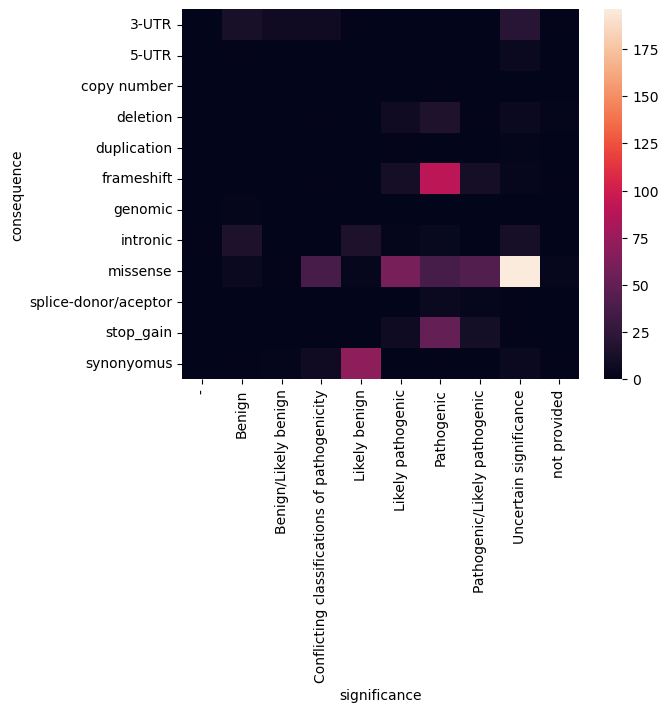

In [36]:
sns.heatmap(conseq_signi)

## Transpose 

In [37]:
conseq_signi.T

consequence,3-UTR,5-UTR,copy number,deletion,duplication,frameshift,genomic,intronic,missense,splice-donor/aceptor,stop_gain,synonyomus
significance,,,,,,,,,,,,
-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Benign,13.0,1.0,0.0,0.0,0.0,0.0,2.0,15.0,5.0,0.0,0.0,1.0
Benign/Likely benign,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
Conflicting classifications of pathogenicity,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,0.0,0.0,8.0
Likely benign,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.0,0.0,0.0,70.0
Likely pathogenic,0.0,0.0,0.0,8.0,1.0,11.0,0.0,2.0,59.0,0.0,7.0,0.0
Pathogenic,0.0,0.0,1.0,16.0,0.0,91.0,0.0,4.0,36.0,6.0,51.0,1.0
Pathogenic/Likely pathogenic,0.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,42.0,3.0,10.0,0.0
Uncertain significance,21.0,5.0,0.0,6.0,2.0,3.0,0.0,12.0,196.0,1.0,1.0,6.0


<Axes: xlabel='significance', ylabel='consequence'>

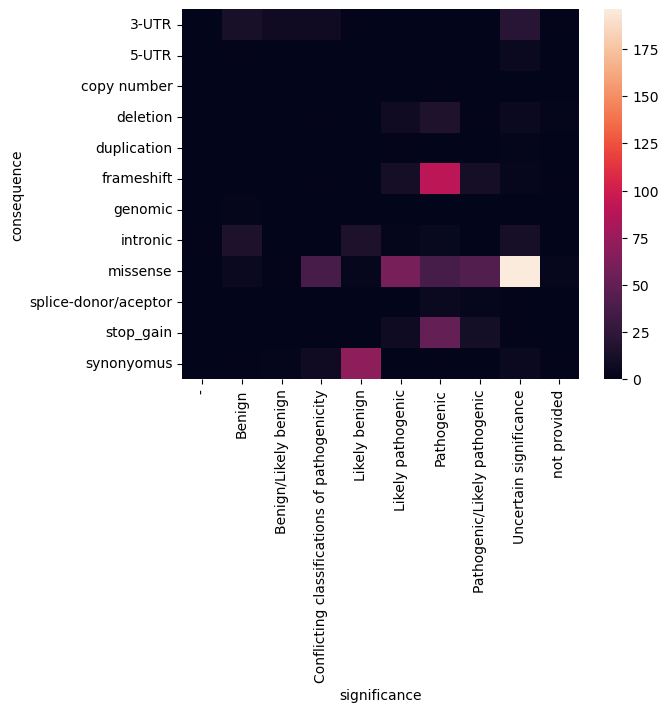

In [38]:
sns.heatmap(conseq_signi)

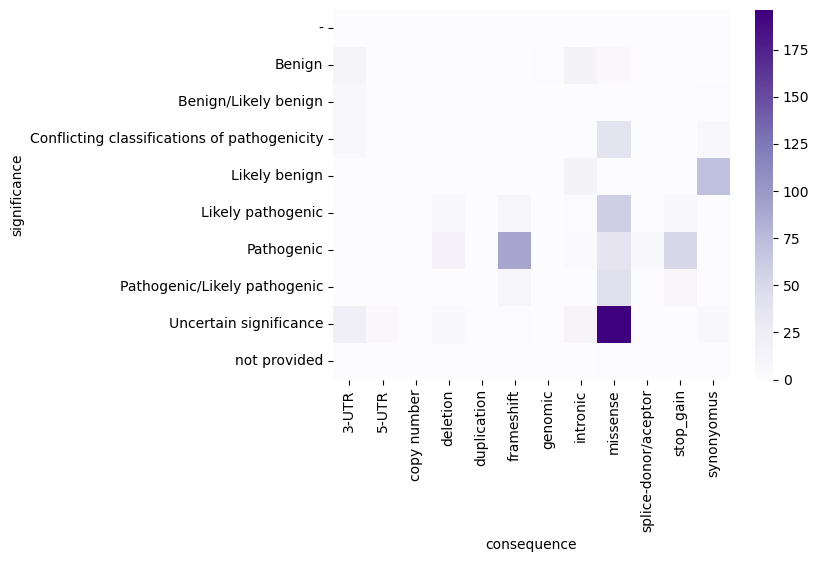

In [40]:
sns.heatmap(conseq_signi.T, cmap="Purples");

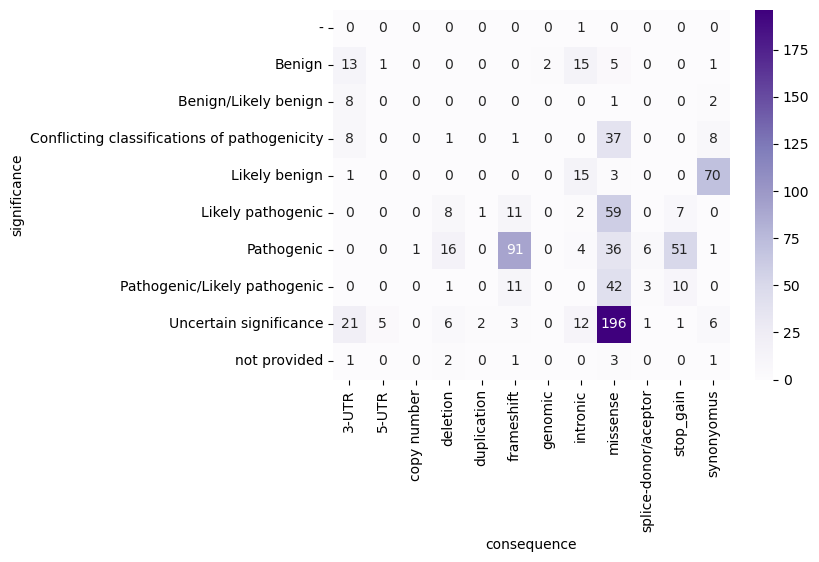

In [41]:
sns.heatmap(conseq_signi.T, cmap="Purples", annot=True, fmt=".0f");

In [42]:
conseq_signi

significance,-,Benign,Benign/Likely benign,Conflicting classifications of pathogenicity,Likely benign,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,not provided
consequence,,,,,,,,,,
3-UTR,0.0,13.0,8.0,8.0,1.0,0.0,0.0,0.0,21.0,1.0
5-UTR,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
copy number,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
deletion,0.0,0.0,0.0,1.0,0.0,8.0,16.0,1.0,6.0,2.0
duplication,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
frameshift,0.0,0.0,0.0,1.0,0.0,11.0,91.0,11.0,3.0,1.0
genomic,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
intronic,1.0,15.0,0.0,0.0,15.0,2.0,4.0,0.0,12.0,0.0
missense,0.0,5.0,1.0,37.0,3.0,59.0,36.0,42.0,196.0,3.0


In [66]:
conseq_signi_1 = conseq_signi

In [67]:
conseq_signi_1.columns

Index(['-', 'Benign', 'Benign/Likely benign',
       'Conflicting classifications of pathogenicity', 'Likely benign',
       'Likely pathogenic', 'Pathogenic', 'Pathogenic/Likely pathogenic',
       'Uncertain significance', 'not provided', 'Likely Benign'],
      dtype='object', name='significance')

In [68]:
conseq_signi_1.index

Index(['3-UTR', '5-UTR', 'copy number', 'deletion', 'duplication',
       'frameshift', 'genomic', 'intronic', 'missense', 'splice-donor/aceptor',
       'stop_gain', 'synonyomus'],
      dtype='object', name='consequence')

In [69]:
conseq_signi_1['Likely Benign'] = conseq_signi_1['Benign/Likely benign'] + conseq_signi_1['Likely benign']

In [70]:
conseq_signi_1.head()

significance,-,Benign,Benign/Likely benign,Conflicting classifications of pathogenicity,Likely benign,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,not provided,Likely Benign
consequence,,,,,,,,,,,
3-UTR,0.0,13.0,8.0,8.0,1.0,0.0,0.0,0.0,21.0,1.0,9.0
5-UTR,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
copy number,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,0.0,1.0,0.0,8.0,16.0,1.0,6.0,2.0,0.0
duplication,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


In [71]:
conseq_signi_1 = conseq_signi_1.drop(['Benign/Likely benign', 'Likely benign'], axis=1)

In [72]:
conseq_signi_1.head()

significance,-,Benign,Conflicting classifications of pathogenicity,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,not provided,Likely Benign
consequence,,,,,,,,,
3-UTR,0.0,13.0,8.0,0.0,0.0,0.0,21.0,1.0,9.0
5-UTR,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,1.0,8.0,16.0,1.0,6.0,2.0,0.0
duplication,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


In [73]:
conseq_signi_1['Likely Pathogenic'] = conseq_signi_1['Likely pathogenic'] + conseq_signi_1['Pathogenic/Likely pathogenic']

In [74]:
conseq_signi_1.head()

significance,-,Benign,Conflicting classifications of pathogenicity,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,not provided,Likely Benign,Likely Pathogenic
consequence,,,,,,,,,,
3-UTR,0.0,13.0,8.0,0.0,0.0,0.0,21.0,1.0,9.0,0.0
5-UTR,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,1.0,8.0,16.0,1.0,6.0,2.0,0.0,9.0
duplication,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0


In [75]:
conseq_signi_1 = conseq_signi_1.drop(['Likely pathogenic','Pathogenic/Likely pathogenic'], axis = 1)

In [76]:
conseq_signi_1.head()

significance,-,Benign,Conflicting classifications of pathogenicity,Pathogenic,Uncertain significance,not provided,Likely Benign,Likely Pathogenic
consequence,,,,,,,,
3-UTR,0.0,13.0,8.0,0.0,21.0,1.0,9.0,0.0
5-UTR,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
copy number,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,1.0,16.0,6.0,2.0,0.0,9.0
duplication,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


In [77]:
conseq_signi_1

significance,-,Benign,Conflicting classifications of pathogenicity,Pathogenic,Uncertain significance,not provided,Likely Benign,Likely Pathogenic
consequence,,,,,,,,
3-UTR,0.0,13.0,8.0,0.0,21.0,1.0,9.0,0.0
5-UTR,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
copy number,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,1.0,16.0,6.0,2.0,0.0,9.0
duplication,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
frameshift,0.0,0.0,1.0,91.0,3.0,1.0,0.0,22.0
genomic,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
intronic,1.0,15.0,0.0,4.0,12.0,0.0,15.0,2.0
missense,0.0,5.0,37.0,36.0,196.0,3.0,4.0,101.0


In [78]:
conseq_signi_1['not provided'] = conseq_signi_1['-'] + conseq_signi_1['not provided']

In [80]:
conseq_signi_1

significance,-,Benign,Conflicting classifications of pathogenicity,Pathogenic,Uncertain significance,not provided,Likely Benign,Likely Pathogenic
consequence,,,,,,,,
3-UTR,0.0,13.0,8.0,0.0,21.0,1.0,9.0,0.0
5-UTR,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
copy number,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,1.0,16.0,6.0,2.0,0.0,9.0
duplication,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
frameshift,0.0,0.0,1.0,91.0,3.0,1.0,0.0,22.0
genomic,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
intronic,1.0,15.0,0.0,4.0,12.0,1.0,15.0,2.0
missense,0.0,5.0,37.0,36.0,196.0,3.0,4.0,101.0


In [81]:
conseq_signi_1 = conseq_signi_1.drop(['-'], axis = 1)

In [82]:
conseq_signi_1

significance,Benign,Conflicting classifications of pathogenicity,Pathogenic,Uncertain significance,not provided,Likely Benign,Likely Pathogenic
consequence,,,,,,,
3-UTR,13.0,8.0,0.0,21.0,1.0,9.0,0.0
5-UTR,1.0,0.0,0.0,5.0,0.0,0.0,0.0
copy number,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,1.0,16.0,6.0,2.0,0.0,9.0
duplication,0.0,0.0,0.0,2.0,0.0,0.0,1.0
frameshift,0.0,1.0,91.0,3.0,1.0,0.0,22.0
genomic,2.0,0.0,0.0,0.0,0.0,0.0,0.0
intronic,15.0,0.0,4.0,12.0,1.0,15.0,2.0
missense,5.0,37.0,36.0,196.0,3.0,4.0,101.0


In [83]:
conseq_signi_2 = conseq_signi_1

### change the order of columns 

In [84]:
conseq_signi_2 = conseq_signi_2.rename(columns={
    "Conflicting classifications of pathogenicity": "Conflicting",
    "Uncertain significance": "Uncertain",
})

In [85]:
conseq_signi_2

significance,Benign,Conflicting,Pathogenic,Uncertain,not provided,Likely Benign,Likely Pathogenic
consequence,,,,,,,
3-UTR,13.0,8.0,0.0,21.0,1.0,9.0,0.0
5-UTR,1.0,0.0,0.0,5.0,0.0,0.0,0.0
copy number,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,1.0,16.0,6.0,2.0,0.0,9.0
duplication,0.0,0.0,0.0,2.0,0.0,0.0,1.0
frameshift,0.0,1.0,91.0,3.0,1.0,0.0,22.0
genomic,2.0,0.0,0.0,0.0,0.0,0.0,0.0
intronic,15.0,0.0,4.0,12.0,1.0,15.0,2.0
missense,5.0,37.0,36.0,196.0,3.0,4.0,101.0


### change the order of columns

In [93]:
my_order = [
    "not provided",
    "Conflicting",
    "Benign",
    "Likely Benign",
    "Uncertain",
    "Likely Pathogenic",
    "Pathogenic",
]

In [94]:
conseq_signi_2 = conseq_signi_2[my_order]

In [95]:
conseq_signi_2

significance,not provided,Conflicting,Benign,Likely Benign,Uncertain,Likely Pathogenic,Pathogenic
consequence,,,,,,,
3-UTR,1.0,8.0,13.0,9.0,21.0,0.0,0.0
5-UTR,0.0,0.0,1.0,0.0,5.0,0.0,0.0
copy number,0.0,0.0,0.0,0.0,0.0,0.0,1.0
deletion,2.0,1.0,0.0,0.0,6.0,9.0,16.0
duplication,0.0,0.0,0.0,0.0,2.0,1.0,0.0
frameshift,1.0,1.0,0.0,0.0,3.0,22.0,91.0
genomic,0.0,0.0,2.0,0.0,0.0,0.0,0.0
intronic,1.0,0.0,15.0,15.0,12.0,2.0,4.0
missense,3.0,37.0,5.0,4.0,196.0,101.0,36.0


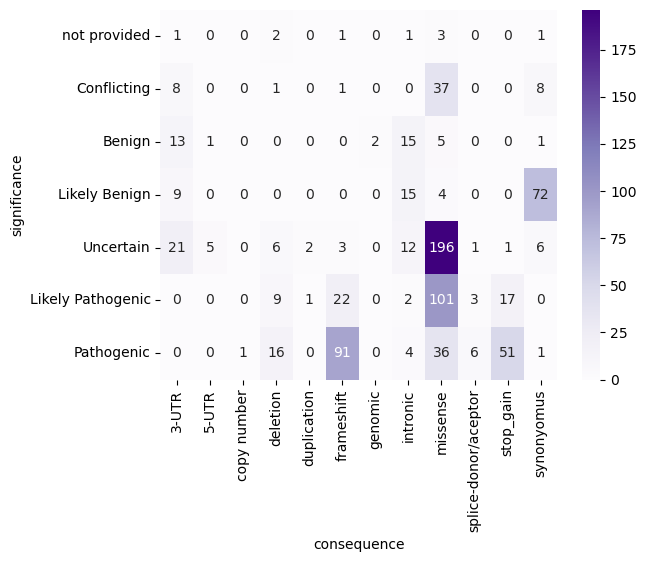

In [96]:
sns.heatmap(conseq_signi_2.T, cmap="Purples", annot=True, fmt=".0f");

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

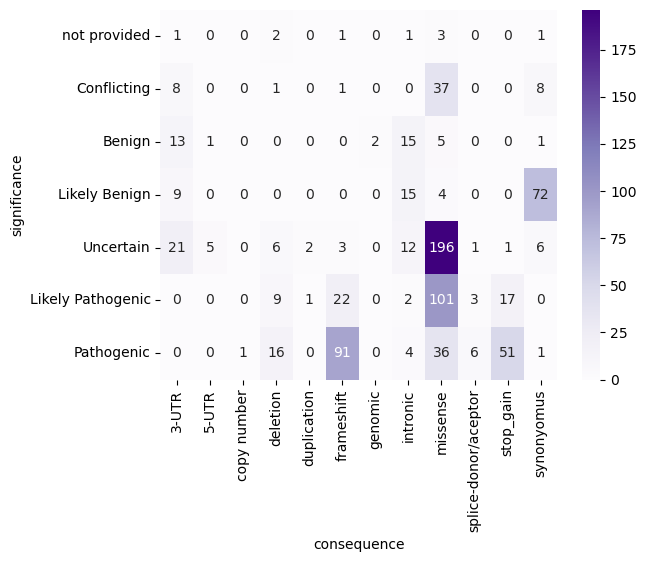

In [97]:
sns.heatmap(conseq_signi_2.T, cmap="Purples", annot=True, fmt=".0f");

plt.savefig("ighmbp2_heatmap.png", dpi=300, bbox_inches="tight")  # dpi=300 for high quality
plt.close

### adding the totoal of each row and column 

In [68]:
conseq_signi_3 = conseq_signi_2.copy()

In [72]:
# Add sum of each row
conseq_signi_3["Row Total"] = conseq_signi_3.sum(axis=1)

# Add sum of each column
conseq_signi_3.loc["Column Total"] = conseq_signi_3.sum(axis=0)


In [93]:
conseq_signi_3

significance,Benign,Likely Benign,Conflicting,Uncertain,Likely Pathogenic,Pathogenic,Row Total
consequence,,,,,,,
3-UTR,5.0,9.0,1.0,22.0,0.0,0.0,37.0
5-UTR,4.0,5.0,0.0,2.0,0.0,0.0,11.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0,1.0
deletion,0.0,1.0,0.0,6.0,1.0,10.0,18.0
duplication,0.0,0.0,0.0,0.0,1.0,0.0,1.0
frameshift,0.0,0.0,1.0,7.0,11.0,50.0,69.0
genomic,2.0,2.0,0.0,1.0,0.0,0.0,5.0
intronic,43.0,195.0,15.0,18.0,5.0,0.0,276.0
missense,8.0,14.0,68.0,479.0,26.0,8.0,603.0


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

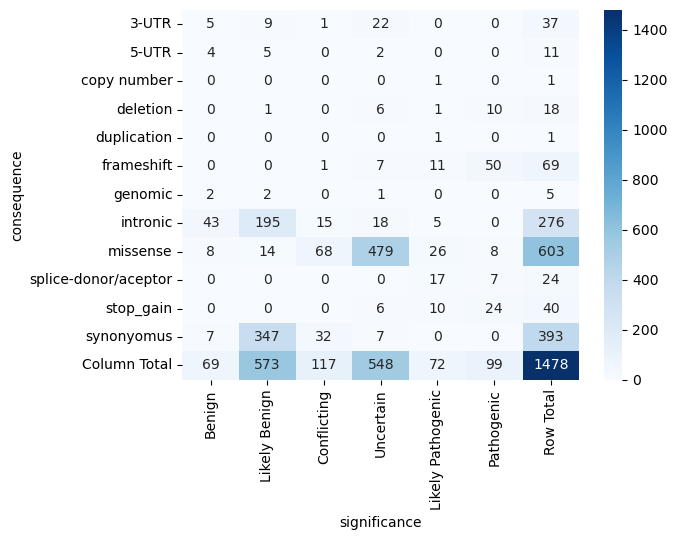

In [92]:
sns.heatmap(conseq_signi_3, cmap="Blues", annot=True, fmt=".0f");

plt.savefig("ighmbp2_heatmap.png", dpi=300, bbox_inches="tight")  # dpi=300 for high quality
plt.close